In [2]:
import pandas as pd
import string

# Besede in naglasi

Najprej preberemo seznam besed in naglašenih črk v besedah; te moramo nato pretvoriti v bolj oprijemljiv zapis.

Pri določanju zlogov poiščemo vse izolirane samoglasnike in jih proglasimo za svoj zlog. 
Samoglasniki, ki ne spadajo v ASCII, so poudarjeni (pri tem enako obravnamo tudi zlogotvorni _r_), ostali niso.

In [3]:
vse_besede = pd.read_csv("obdelani_podatki/besede.csv", names=["beseda", "poudarjena_beseda"])

In [4]:
vse_besede

,beseda,poudarjena_beseda
0,Pierre,Pierré
1,Pierra,Piérra
2,Pierrea,Pierréa
3,Pierru,Piérru
4,Pierreu,Pierréu
...,...,...
933101,zanj,zánj
933102,zanjo,zánjo
933103,zanju,zánju
933104,zanje,zánje


In [5]:
# Poiščimo vse črke v besedah, ki ne spadajo v ASCII
# Te potrebujemo, da lahko določimo, kaj je samoglasnik

def neznane_crke(beseda):
    return {x for x in beseda if ord(x) > 0x7f}

vse_neznanke = set()
for s in vse_besede['poudarjena_beseda'].apply(neznane_crke).values:
    vse_neznanke.update(s)

neznanke = "".join(vse_neznanke)
neznanke

'ÚĆšŠÍČćöÉáäĐÓÁúŔčžŽíëÖđóéŕµü'

In [6]:
def poudarjeni_zlogi(poudarjena_beseda):
    """Pretvori zapis s poudarjenimi znaki v zapis zlogov. Znak '-' pomeni poudarjen zlog, 'u' pa nepoudarjen.
        'zánju' -> '-u'
    """

    def je_samoglasnik(ch):
        return ch in 'aeiouAEIOUöëÁóÓŕÚŔúáÖÍíäüÉé'

    def je_poudarjen(samoglasnik):
        if len(samoglasnik) == 1:
            return samoglasnik not in "aeiou"
        else:
            return any(je_poudarjen(ch) for ch in samoglasnik)

    samoglasniki = []
    for i, ch in enumerate(poudarjena_beseda):
        if je_samoglasnik(ch):
            if i >= 1 and je_samoglasnik(poudarjena_beseda[i-1]):
                # samoglasnik ni izoliran
                samoglasniki[-1] += ch
            else:
                samoglasniki.append(ch)
    
    return "".join(map(lambda ch: '-' if je_poudarjen(ch) else 'u', samoglasniki))

vse_besede['zlogi'] = vse_besede.poudarjena_beseda.apply(poudarjeni_zlogi)
vse_besede

,beseda,poudarjena_beseda,zlogi
0,Pierre,Pierré,u-
1,Pierra,Piérra,-u
2,Pierrea,Pierréa,u-
3,Pierru,Piérru,-u
4,Pierreu,Pierréu,u-
...,...,...,...
933101,zanj,zánj,-
933102,zanjo,zánjo,-u
933103,zanju,zánju,-u
933104,zanje,zánje,-u


In [7]:
# Pripravimo si zgoščevalno tabelo besed in zlogov, da lahko v nadaljevanju hitreje opravimo analizo
besede_zlogi = {}
for beseda, zlog in zip(vse_besede.beseda, vse_besede.zlogi):
    besede_zlogi[beseda.lower()] = zlog
besede_zlogi

{'pierre': 'u-',
 'pierra': '-u',
 'pierrea': 'u-',
 'pierru': '-u',
 'pierreu': 'u-',
 'pierrom': 'uu',
 'pierreom': 'u-',
 'pierrov': '-u',
 'pierreov': 'u-',
 'pierroma': '-uu',
 'pierreoma': 'u-u',
 'pierrih': '-u',
 'pierreih': 'u-',
 'pierri': '-u',
 'pierrei': 'u-',
 'pierree': 'u-',
 'shakespeare': 'uu-u',
 'shakespeara': 'uu-u',
 'shakespearja': 'uu-u',
 'shakespearea': 'uuu-',
 'shakespeareja': 'uuu-u',
 'shakespearju': 'uu-u',
 'shakespearu': 'uu-u',
 'shakespeareu': 'uuu-',
 'shakespeareju': 'uuu-u',
 'shakespearjem': 'uu-u',
 'shakespearom': 'uu-u',
 'shakespeareom': 'uuuu',
 'shakespearejem': 'uuu-u',
 'shakespearjev': 'uuuu',
 'shakespearov': 'uu-u',
 'shakespeareov': 'uu-u',
 'shakespearejev': 'uuu-u',
 'shakespearjema': 'uuuuu',
 'shakespearoma': 'uu-uu',
 'shakespearejema': 'uuu-uu',
 'shakespeareoma': 'uuu-u',
 'shakespearih': 'uu-u',
 'shakespearjih': 'uu-u',
 'shakespeareih': 'uuu-',
 'shakespearejih': 'uuu-u',
 'shakespeari': 'uu-u',
 'shakespearji': 'uu-u',
 'sha

# Podatki

Sedaj preberemo podatke o virih, kategorijah in literarnih delih.

In [8]:
literarna_dela = pd.read_csv("obdelani_podatki/podatki.csv", names=["vir", "naslov", "avtor", "besedilo", "leto"])
literarna_dela

,vir,naslov,avtor,besedilo,leto
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,"""Grad"" Turnska peč",Janko Orožen,"\nPod Tovstom je slikovita in ozka soteska, ki...",-1
1,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,&quot;Grad&quot; na Dobrovlju,Janko Orožen,\nNa težko dostopnem vrhu Dobrovlja je stal ne...,-1
2,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,&quot;Grad&quot; na Marnem,Janko Orožen,"\nOb cesti, ki vodi pod Marnim na Dol, je kape...",-1
3,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,"""Grad"" na Vipoti",Janko Orožen,\nVipota! Kdo je ne pozna! S svojo piramidasto...,-1
4,https://sl.wikisource.org/wiki/%22Pisarska%22_...,"""Pisarska"" praviš",Stanko Vraz,"\n""Pisarska"", praviš, ""reč je ničemurna:\n\nde...",-1
...,...,...,...,...,...
14737,https://sl.wikisource.org/wiki/%E2%80%9EGrad%E...,„Grad“ v Skalah,Janko Orožen,\nNekoč se je širilo jezero od Gradišča do Ška...,-1
14738,https://sl.wikisource.org/wiki/%E2%80%9ESlov._...,"„Slov. plan. društvo"" z ozirom na naše narodno...",Ivan Vdovič,"Krasna je zemlja slovenska. Na mejah, ki dele ...",1895
14739,https://sl.wikisource.org/wiki/%E2%80%9EZur_Pf...,"""Zur pflege der slovensichen Schriftsprache an...",NaN,"Von Franz Žnideršič,\nk. k. Professor. Gorz. D...",1903
14740,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,†Ivan Škrjanec,NaN,"V petek, dne 17. julija je umrl v\nrodni hiši ...",1903


In [9]:
viri = pd.read_csv("obdelani_podatki/viri.csv", names=["povezava", "tip"])
viri

,povezava,tip
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,knjiga
1,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,knjiga
2,https://sl.wikisource.org/wiki/%22%C5%A0tok%22...,knjiga
3,https://sl.wikisource.org/wiki/A._Pretnarjevih...,poezija
4,https://sl.wikisource.org/wiki/Abecedni_seznam...,ljudsko slovstvo
...,...,...
625,https://sl.wikisource.org/wiki/%C5%BDolcpa%C5%...,zbrano delo
626,https://sl.wikisource.org/wiki/%C5%BDupanova_M...,antikvarno gradivo
627,https://sl.wikisource.org/wiki/%C5%BDivotopis_...,separat
628,https://sl.wikisource.org/wiki/%C5%BDolcpa%C5%...,zbrano delo


In [10]:
kategorije = pd.read_csv("obdelani_podatki/kategorije.csv", names=["povezava", "kategorija"])
kategorije

,povezava,kategorija
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,Objavljeno s pisnim dovoljenjem
1,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,Dela-G
2,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,Objavljeno s pisnim dovoljenjem
3,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,Dela-G
4,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,Objavljeno s pisnim dovoljenjem
...,...,...
58791,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,Dela leta 1903
58792,https://sl.wikisource.org/wiki/%E2%80%A0P._Lev...,V javni lasti
58793,https://sl.wikisource.org/wiki/%E2%80%A0P._Lev...,Dela-P
58794,https://sl.wikisource.org/wiki/%E2%80%A0P._Lev...,Slovan (1902)


In [11]:
# Definiramo pomožne funkcije za pripravo pretvorbe besedil v zaporedje zlogov
def standardiziraj_whitespace(besedilo):
    besedilo = "".join(" " if ch.isspace() else ch for ch in besedilo)
    while "  " in besedilo:
        besedilo = besedilo.replace("  ", " ")
    return besedilo.strip()

def pripravi_besedilo(besedilo):
    """Odstrani vse nečrkovne in ne-whitespace znake, ter standardiziraj whitespace"""
    sprejeti_znaki = string.ascii_letters + neznanke + " "
    besedilo = standardiziraj_whitespace(besedilo)
    return "".join(ch for ch in besedilo if ch in sprejeti_znaki)

In [12]:
def pretvori_v_zloge(pripravljeno_besedilo):
    """Pretvori besedilo v zaporedje zlogov. V zaporedju ne ohranimo mej med besedami."""
    besede = pripravljeno_besedilo.split()
    zlogi = ""
    for beseda in besede:
        if beseda.lower() in besede_zlogi:
            zlogi += besede_zlogi[beseda.lower()]
        else:
            # če besede slučajno ni, obstaja možnost, da je zapisana s poudarjenimi zlogi
            # takrat jih interpoliramo na mestu
            # sicer bo funkcija vrnila same nepoudarjene zloge, kar ni optimalno, ampak
            # glede tega ne moramo narediti ravno veliko
            zlogi += poudarjeni_zlogi(beseda.lower())
    return zlogi

literarna_dela["zaporedje_zlogov"] = literarna_dela.besedilo.apply(lambda s: pretvori_v_zloge(pripravi_besedilo(s)))
literarna_dela
# ta celica se izvaja malce dlje časa (~80 sekund)

,vir,naslov,avtor,besedilo,leto,zaporedje_zlogov
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,"""Grad"" Turnska peč",Janko Orožen,"\nPod Tovstom je slikovita in ozka soteska, ki...",-1,uuu-uu-uu-uu-uuuuu-uu-u-u-u-u-u-u-u-u-uu-u-u-u...
1,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,&quot;Grad&quot; na Dobrovlju,Janko Orožen,\nNa težko dostopnem vrhu Dobrovlja je stal ne...,-1,u-uu-u-uuuu--u-u-u-u---u-uuu-uu-uu-uuu-uu----u...
2,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,&quot;Grad&quot; na Marnem,Janko Orožen,"\nOb cesti, ki vodi pod Marnim na Dol, je kape...",-1,-u-u-uuuuu--u-uu-u-u-uu-u--u--u-u-u-u--uu-uuuu...
3,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,"""Grad"" na Vipoti",Janko Orožen,\nVipota! Kdo je ne pozna! S svojo piramidasto...,-1,uuu---u--uuu-uuu-u-uu-u-uuuuu-u--uuu-uuu---u-u...
4,https://sl.wikisource.org/wiki/%22Pisarska%22_...,"""Pisarska"" praviš",Stanko Vraz,"\n""Pisarska"", praviš, ""reč je ničemurna:\n\nde...",-1,uuu-u--uuuuu-u-u-uuuuu---u-uu-uu-uuu--u-u-u--u...
...,...,...,...,...,...,...
14737,https://sl.wikisource.org/wiki/%E2%80%9EGrad%E...,„Grad“ v Skalah,Janko Orožen,\nNekoč se je širilo jezero od Gradišča do Ška...,-1,u-u--uuuuuuu-uu--uuu-u-uu-uu-uuu-u--uu--uuu-uu...
14738,https://sl.wikisource.org/wiki/%E2%80%9ESlov._...,"„Slov. plan. društvo"" z ozirom na naše narodno...",Ivan Vdovič,"Krasna je zemlja slovenska. Na mejah, ki dele ...",1895,u---uu-uu-uu-uu-uu-uu-uuuuuuu-uu-uuuu-uu-u-uu-...
14739,https://sl.wikisource.org/wiki/%E2%80%9EZur_Pf...,"""Zur pflege der slovensichen Schriftsprache an...",NaN,"Von Franz Žnideršič,\nk. k. Professor. Gorz. D...",1903,u-uuuuuu-uu-uuu-uuuu--uuuu-uu-u-uuuuu-u-u-u-u-...
14740,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,†Ivan Škrjanec,NaN,"V petek, dne 17. julija je umrl v\nrodni hiši ...",1903,-u-u-u-u--u-uuuu-uuuu-u---uuuu-u-u-uu--uu---u-...


# Analiza

## Število zlogov

Prvo vprašanje se nanaša na medsebojno razmerje med številom poudarjenih in nepoudarjenih zlogov v besedilu.
Večina besed je sestavljena iz več kot enega zloga; dva poudarjena zloga se redko pojavita skupaj.
Iz tega sklepamo, da bo nepoudarjenih zlogov večinoma več kot poudarjenih.
Poleg tega vemo, da je veliko poezije napisano ritmično, v neki stopici; ta zahteva neko minimalno količino poudarjenih zlogov.
Po drugi strani je ostalo leposlovje manj strogo glede fonetike, pričakujemo, da bodo dela vsebovala več daljših besed, ter imele posledično manj poudarjenih zlogov (gledano relativno na vse zloge).
Najmanj poudarjenih zlogov pričakujemo od neleposlovnih del, ki imajo najmanj tovrstnih omejitev.

Obstaja pomembna izjema k zgornjemu razmišljanju.
Nekatere bolj moderne oblike poezije se popolnoma izognejo klasični poezijski obliki, kar pomeni tudi, da se ne držijo stopice.
Če podobno velja za ostala moderna besedila, bi pričakovali, da se je število poudarjenih zlogov s časom zniževalo.

Hipoteze za ta del so naslednje:
- večina literarnih del ima več poudarjenih zlogov kot nepoudarjenih
- leposlovna dela imajo večji del zlogov poudarjen od neleposlovnih
- izmed leposlovnih del ima poezija največji delež poudarjenih zlogov
- bolj moderna besedila imajo manjši delež poudarjenih zlogov kot starejša besedila

In [13]:
vir_naslov_zlogi = literarna_dela[["vir", "naslov", "zaporedje_zlogov", "leto"]].copy()
vir_naslov_zlogi["st_nepoudarjenih"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: s.count("u"))
vir_naslov_zlogi["st_poudarjenih"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: s.count("-"))

# zelo kratka besedila nas ne zanimajo
zanimivi = vir_naslov_zlogi[vir_naslov_zlogi.st_poudarjenih + vir_naslov_zlogi.st_nepoudarjenih > 10].copy()
zanimivi["razmerje"] = zanimivi.st_poudarjenih / (zanimivi.st_nepoudarjenih + zanimivi.st_poudarjenih)
zanimivi.sort_values(by="razmerje")

,vir,naslov,zaporedje_zlogov,leto,st_nepoudarjenih,st_poudarjenih,razmerje
591,https://sl.wikisource.org/wiki/Blabla,Blabla,-uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu...,-1,56,5,0.081967
10094,https://sl.wikisource.org/wiki/Sedmo_pismo_F._...,"Sedmo pismo Franceta Prešerna Stanku Vrazu, Lj...",uuuu-uu-uuuuuuuuuuuuu-uuuuuu-uuuu-uuuuuuuuuuuu...,1833,411,44,0.096703
12916,https://sl.wikisource.org/wiki/Vorred,"TA CELI CATEHISMUS, ENI PSALMI, INU TEH VEKSHI...",--uuuuu-u-uuu-uu-uu-uu-uuuuuuuuuuuuuuu-uuuuuuu...,-1,118,14,0.106061
866,https://sl.wikisource.org/wiki/Bri%C5%BEinski_...,II. brižinski spomenik,u-u-uuuuuuuuuu-u-uuuuu-uuuuuu-uuuuuuuuuuuu-uuu...,-1,711,85,0.106784
2530,https://sl.wikisource.org/wiki/II._bri%C5%BEin...,II. brižinski spomenik,u-u-uuuuuuuuuu-u-uuuuu-uuuuuu-uuuuuuuuuuuu-uuu...,-1,711,85,0.106784
...,...,...,...,...,...,...,...
3596,"https://sl.wikisource.org/wiki/Kar_je,_be%C5%BEi","Kar je, beži",--u-----u-u-uuu----u-u--,-1,8,16,0.666667
3204,https://sl.wikisource.org/wiki/KLIP_KLOP,SREDI DOMOVINE. - V čolnu posedajo,u-u-u-u--u-u------u-u-----u-u--,-1,10,21,0.677419
3771,https://sl.wikisource.org/wiki/Klip_klop,SREDI DOMOVINE. - V čolnu posedajo,u-u-u-u--u-u------u-u-----u-u--,-1,10,21,0.677419
879,https://sl.wikisource.org/wiki/Br%C5%BE_domov,Brž domov,-u-u----u-u----u-u----u-u--u,-1,9,19,0.678571


In [14]:
len(zanimivi)

14649

In [15]:
len(zanimivi[zanimivi.razmerje < 0.5]) / len(zanimivi)

0.943682162604956

Velika večina dovolj dolgih besedil ima torej več nepoudarjenih zlogov kot poudarjenih. 
S tem smo potrdili prvo hipotezo.
Naslednja hipoteza je, da imajo leposlovna besedila več poudarjenih zlogov kot neleposlovna, ter da ima poezija izmed prvih največje razmerje, ker se vsaj starejša večinoma držijo stopice; ta pa zahteva neko minimalno razmerje (npr. jamb 1:1, amfibrah 1:2, itd.). 
Zgodbe, romani in podobna druga dela pa dovoljujejo daljše besede, ki imajo lahko tudi več nepoudarjenih zlogov.

Podatkov o tipih je zelo malo (podatki so na voljo le za 630 del izmed več kot 14 tisočih), torej ta del ni zanesljiv.

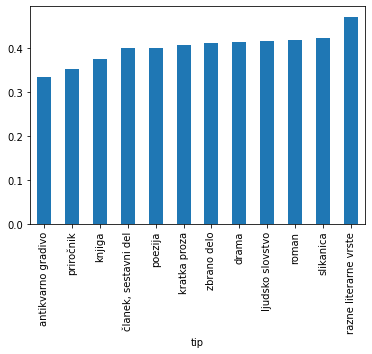

In [16]:
vrste = pd.merge(zanimivi, viri, left_on="vir", right_on="povezava").groupby("tip")
r = vrste.razmerje.count()
vrste.razmerje.mean()[r>5].sort_values().plot.bar()
del r, vrste

Rezultat je do neke mere pričakovan, do neke pa ne. 
Antikvarna dela, priročniki, knjige in članki so neleposlovna dela, in imajo res manjše razmerje kot leposlovna. 
Med preostalimi deli pa je poezija imela ravno najmanjše razmerje, kar je v popolnem nasprotju s hipotezo.

Poglejmo si še rezultate glede na letnico izdaje.

<AxesSubplot:>

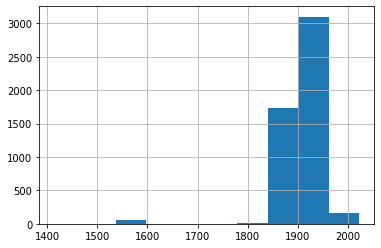

In [17]:
zanimivi_z_letnico = zanimivi[zanimivi.leto > -1]
zanimivi_z_letnico.leto.hist()

Velika večina del z označeno letnico izhaja iz poznega 19. ali zgodnjega 20. stoletja.
Nekaj del je tudi iz več sto let pred tem; teh ne moramo zanesljivo analizirati, ker se je jezik od tedaj že toliko spremenil, da veliko njihovih besed ni v slovarju poudarjenih zlogov.

<AxesSubplot:>

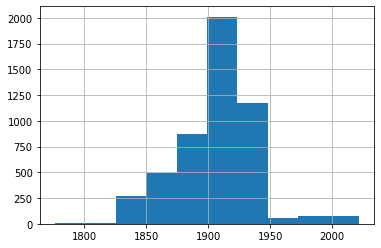

In [18]:
zanimivi_z_letnico = zanimivi[zanimivi.leto > 1750]
zanimivi_z_letnico.leto.hist()

In [19]:
len(zanimivi_z_letnico)

5016

<AxesSubplot:xlabel='leto'>

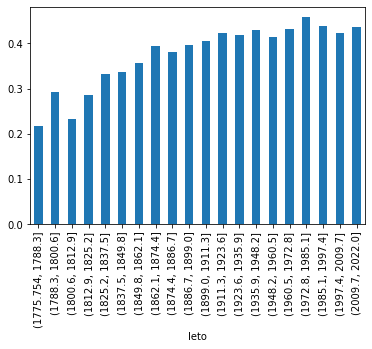

In [20]:
zanimivi_z_letnico.groupby(pd.cut(zanimivi_z_letnico.leto, 20)).razmerje.mean().plot.bar()

Vrednosti nekaj časa naraščajo, nato pa se navidez stabilizirajo nekje v prvi polovici prejšnjega stoletja.
To še ne pomeni, da se je razmerje v vseh objavljenih delih do tedaj dejansko povečevalo; možno je, da je večina starejših del drugačne vrste (npr. vsebuje manj leposlovnih del) kot novejša dela.
Rezultat pa v vsakem primeru ovrže postavljeno hipotezo.

In [21]:
del zanimivi, zanimivi_z_letnico

## Vrsta stopice

Naslednji del analize bo gledal najpogostejšo vrsto stopice v besedilih.

Stopica je vnapej določeno zaporedje poudarjenih/nepoudarjenih zlogov. Pri tej analizi se bomo omejili na naslednje:
- u- (jamb)
- -u (trohej)
- -uu (daktil)
- u-u (amfibrah)

Te so, glede na [vir](https://sl.wikipedia.org/wiki/Stopica), najbolj primerne za slovenski jezik.

Stopice bomo v posamičnem delu prešteli ločeno; najprej preštejemo, koliko ima jambov, nato preštejemo število trohejev v celotnem besedilu, nato število daktilov in na koncu število amfibrahov.
Dobljeno število jambov bo tako vedno večje (ali enako) kot število amfibrahov, ker je jamb vsebovan v amfibrahu. 
Podobno velja tudi za nekatere druge kombinacije stopic.

In [22]:
def prestej_stopico(besedilo, stopica):
    return besedilo.count(stopica)

vir_naslov_zlogi["jamb"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: prestej_stopico(s, "u-"))
vir_naslov_zlogi["trohej"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: prestej_stopico(s, "-u"))
vir_naslov_zlogi["daktil"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: prestej_stopico(s, "-uu"))
vir_naslov_zlogi["amfibrah"] = vir_naslov_zlogi.zaporedje_zlogov.apply(lambda s: prestej_stopico(s, "u-u"))

vir_naslov_zlogi

,vir,naslov,zaporedje_zlogov,leto,st_nepoudarjenih,st_poudarjenih,jamb,trohej,daktil,amfibrah
0,https://sl.wikisource.org/wiki/%22Grad%22_Turn...,"""Grad"" Turnska peč",uuu-uu-uu-uu-uuuuu-uu-u-u-u-u-u-u-u-u-uu-u-u-u...,-1,71,47,41,41,19,28
1,https://sl.wikisource.org/wiki/%22Grad%22_na_D...,&quot;Grad&quot; na Dobrovlju,u-uu-u-uuuu--u-u-u-u---u-uuu-uu-uu-uuu-uu----u...,-1,114,89,64,64,31,37
2,https://sl.wikisource.org/wiki/%22Grad%22_na_M...,&quot;Grad&quot; na Marnem,-u-u-uuuuu--u-uu-u-u-uu-u--u--u-u-u-u--uu-uuuu...,-1,75,48,36,37,18,20
3,https://sl.wikisource.org/wiki/%22Grad%22_na_V...,"""Grad"" na Vipoti",uuu---u--uuu-uuu-u-uu-u-uuuuu-u--uuu-uuu---u-u...,-1,396,274,210,210,106,121
4,https://sl.wikisource.org/wiki/%22Pisarska%22_...,"""Pisarska"" praviš",uuu-u--uuuuu-u-u-uuuuu---u-uu-uu-uuu--u-u-u--u...,-1,86,63,47,46,19,24
...,...,...,...,...,...,...,...,...,...,...
14737,https://sl.wikisource.org/wiki/%E2%80%9EGrad%E...,„Grad“ v Skalah,u-u--uuuuuuu-uu--uuu-u-uu-uu-uuu-u--uu--uuu-uu...,-1,790,536,422,422,226,247
14738,https://sl.wikisource.org/wiki/%E2%80%9ESlov._...,"„Slov. plan. društvo"" z ozirom na naše narodno...",u---uu-uu-uu-uu-uu-uu-uuuuuuu-uu-uuuu-uu-u-uu-...,1895,951,524,454,453,263,297
14739,https://sl.wikisource.org/wiki/%E2%80%9EZur_Pf...,"""Zur pflege der slovensichen Schriftsprache an...",u-uuuuuu-uu-uuu-uuuu--uuuu-uu-u-uuuuu-u-u-u-u-...,1903,164,69,59,59,40,38
14740,https://sl.wikisource.org/wiki/%E2%80%A0Ivan_%...,†Ivan Škrjanec,-u-u-u-u--u-uuuu-uuuu-u---uuuu-u-u-uu--uu---u-...,1903,215,127,105,106,54,67


In [25]:
zanimivi = vir_naslov_zlogi[vir_naslov_zlogi.st_poudarjenih + vir_naslov_zlogi.st_nepoudarjenih > 10].copy()

# Poglejmo si, če je število jambov kje bistveno drugačno kot število trohejev
len(zanimivi[abs(zanimivi.jamb - zanimivi.trohej) > 1])

0

To dejstvo ni presenetljivo; pove pa nam, da bo izračunano razmerje med trizložno in dvozložno stopico približno enako, ne glede na to, katero dvozložno stopico vzamemo.

In [24]:
zanimivi["rdaktil"] = zanimivi.daktil / zanimivi.jamb
zanimivi["ramfibrah"] = zanimivi.amfibrah / zanimivi.jamb
zanimivi.sort_values(by="rdaktil")

,vir,naslov,zaporedje_zlogov,leto,st_nepoudarjenih,st_poudarjenih,jamb,trohej,daktil,amfibrah,rdaktil,ramfibrah
3771,https://sl.wikisource.org/wiki/Klip_klop,SREDI DOMOVINE. - V čolnu posedajo,u-u-u-u--u-u------u-u-----u-u--,-1,10,21,10,9,0,5,0.0000,0.500000
14521,https://sl.wikisource.org/wiki/%C5%BDebelj,Žebelj,---u------u--u-,-1,3,12,3,3,0,0,0.0000,0.000000
10014,https://sl.wikisource.org/wiki/Samota_(Lojze_G...,Samota,-u-u--u-u---u-u-u-u---u---u-u-u-u-u---u-u-u-u-...,-1,26,38,26,26,0,11,0.0000,0.423077
9123,https://sl.wikisource.org/wiki/Pri_Cizari,Pri Cizari,uuuuuuuuuuuuuuu-u-,-1,16,2,2,1,0,1,0.0000,0.500000
3204,https://sl.wikisource.org/wiki/KLIP_KLOP,SREDI DOMOVINE. - V čolnu posedajo,u-u-u-u--u-u------u-u-----u-u--,-1,10,21,10,9,0,5,0.0000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
10487,https://sl.wikisource.org/wiki/Slovenske_ve%C4...,Slovenske večernice,uu-uuu-uu-uuuuuuu,-1,14,3,3,3,3,3,1.0000,1.000000
4885,https://sl.wikisource.org/wiki/Marjeti%C4%8Dne...,Marjetične meditacije,-uu--uu-uu--uu-uu--uu-uu--uu-uu--uu-uu--uu-uu-...,-1,34,25,16,17,17,8,1.0625,0.500000
7604,https://sl.wikisource.org/wiki/P._Romuald,P. Romuald,-uuuu--uuuuuuuuuuu-uuu---uu-uu-uuuuuuu,1973,29,9,5,6,6,3,1.2000,0.600000
12994,https://sl.wikisource.org/wiki/Vrednost_%C5%BEen,Vrednost žen,-uuuuu-uu-uuu,-1,10,3,2,3,3,2,1.5000,1.000000


In [27]:
zanimivi[zanimivi.naslov == "Na vrhe obešen"]

,vir,naslov,zaporedje_zlogov,leto,st_nepoudarjenih,st_poudarjenih,jamb,trohej,daktil,amfibrah
5975,https://sl.wikisource.org/wiki/Na_vrhe_obe%C5%...,Na vrhe obešen,-u-u-u-u-uu-u-uu-uu-uu-uu--u--u-u-uuu-uu-uu-u-...,-1,422,345,251,252,115,143
